# Depth of investigation with AEM

Purpose of code...
Code based on Doug code xxxx. Conversion of Ross Brodie's Matlab code that examines the depth of investigation with AEM

Pre-requirements... Save output xxx

Overview of this code... # = xxx, ## = user requirement

contact and date...

In [1]:
#import libraries
import pandas as pd
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
import matplotlib as mpl
from itertools import accumulate

# User requirement: enter file one details

In [2]:
## User requirement: enter the folder location where the first .dat file is saved
folder1= str(r"C:/Users/u67397/AnacondaProjects/aem/input_data/")

## User requirement: enter the name of the second .dat file
dat1= "1"

## User requirement: enter the reference model conductivity specified for result file one
reference_EC1 = 0.001

# User requirement: enter file two details

In [3]:
## User requirement: enter the folder location where the second .dat file is saved
folder2= str(r"C:/Users/u67397/AnacondaProjects/aem/input_data/")

## User requirement: enter the name of the second .dat file
dat2= '8'

## User requirement: enter the reference model conductivity specified for result file two
reference_EC2 = 0.01

# User requirement: enter folder location to save files

In [4]:
## User requirement: enter the folder location where to save files into

output_folder= str(r"C:/Users/u67397/AnacondaProjects/aem/output_data")

#  User requirement: enter xxx threshold

In [5]:
## User requirement: enter xxx value
threshold= 50

# Import, process and save

In [12]:
# Import EC data for result one
input_dat1= folder1 + dat1+".dat"
input_data_1=pd.read_fwf(input_dat1, header=None) 
data_1=input_data_1.iloc[:,21:51].transpose().reset_index(drop=True) ###note to explain change to EC
datlen=len(input_data_1.index)

# Import EC data for result two
input_dat2= folder2 + dat2+".dat"
data_2=pd.read_fwf(input_dat2, header=None) 
data_2=data_2.iloc[:,21:51].transpose().reset_index(drop=True)

In [31]:
# Import and format depth details
depth=input_data_1.iloc[1:2,52:82].transpose().reset_index(drop=True)
# depth[1].iloc[-1] = depth[1].iloc[-2]
# depth=np.cumsum(depth)
# dt=int(depth[1].iloc[0])
# db=int(depth[1].iloc[-1])

# #Import elevation offset
# elevation=input_data_1.iloc[:,8:9].squeeze()

In [32]:
depth

,1
0,3.30
1,3.62
2,4.00
3,4.40
4,4.84
5,5.32
6,5.84
7,6.42
8,7.08
9,7.78


In [20]:
# calculate xxx
rdi = (np.log10(data_2)-np.log10(data_1)) / (np.log10(reference_EC2)- np.log10(reference_EC1))
pdi = 100 * (1-rdi)

In [21]:
# search for values closest to threshold value set at the beginning of this notebook xxx
doi=(np.abs(pdi - threshold))
doi['depth']=depth
#doi=doi.set_index('depth')
#doi=doi.idxmin(axis=0)


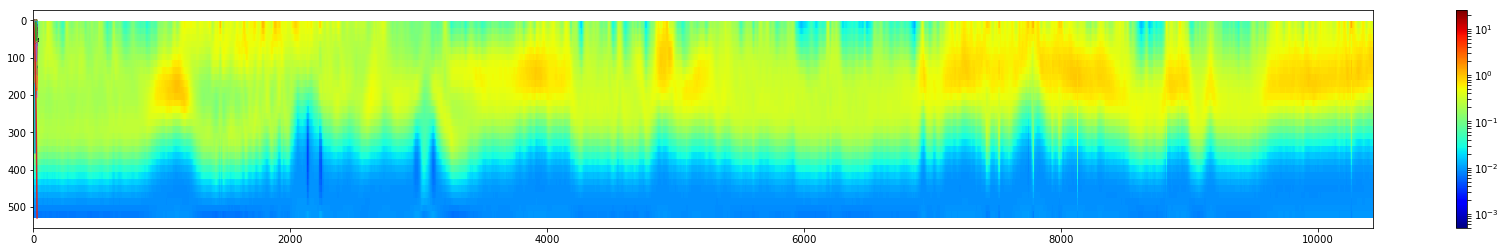

In [24]:
#create a figure that shows EC profile and depth of investigation line for one dataset
plt.figure(figsize =(30,4)) #set size of figure
norm=mpl.colors.LogNorm(vmin=0.0005, vmax=25.01000)#set min and max EC values
im = plt.imshow(data_2, aspect='auto', extent=[0,10422,db,dt], 
                norm=norm,
                cmap=cm.jet) #plot details 
plt.plot(doi) #add depth of investigation line
plt.colorbar(im) #add colourbar
plt.show() #show plot

In [23]:
#create and save a .csv that contains depth of investigation data for input into Discover PA software
rl=doi.subtract(elevation).to_frame() #subtract elevation data from depth of investigation 
rl['rl_'+str(threshold)+'%']=rl #reformat
rl=rl.drop(rl.columns[[0]], axis=1) #reformat 
rl['total_depth_'+str(threshold)+'%']=doi #add depth of investigation
rl['line']=input_data_1[4] #add line data
rl['easting']=input_data_1[6] #add easting data
rl['northing']=input_data_1[7] #add northing data

rl.to_csv(output_folder+'/depth_data.csv') #save doi data as csv

C:\Users\u67397\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2984: RuntimeWarning: '>' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [12]:
# function [pdi,threshdepth,threshdepth_median] = compute_pdi(R1,R2,pctthres,mfilterlength,afilterlength);

# nlayers = size(R1.conductivity,2);

# thickness = [squeeze(R1.thickness(1,:))];%assumes constant thickness along line

# %pretend thickness of last layer is same as second last
# thickness(nlayers) = thickness(nlayers-1);

# dtop = [0 cumsum(thickness(1:nlayers-1))];
# dbot = dtop + thickness;
# dmid = (dtop + dbot)/2;

# np=length(R1.fiducial);
# rdi = (log10(R2.conductivity) - log10(R1.conductivity)) ./ (log10(R2.refcond) - log10(R1.refcond));            
# pdi = 100 * (1 - rdi);    
       
# nthresh = length(pctthres);
# threshdepth = dmid(nlayers)*ones(np,nthresh);
# for i=1:1:nthresh
#     for k=1:1:np
#         li = find(pdi(k,:)>pctthres(i),1,'last');        
#         if(isempty(li))
#             li=nlayers;
#         end        
#         threshdepth(k,i)  = dmid(li);   
#     end
# end


# threshdepth_median = NaN*zeros(np,nthresh);
# for i=1:1:nthresh    
#     dt  = threshdepth(:,i);   
    
#     %median filter
#     dtm = median_filter(dt,mfilterlength);   
    
#     %averaging filter
#     dta = averaging_filter(dtm,afilterlength);   
    
#     threshdepth_median(:,i) = dta;
# end


In [ ]:
# elevation=pd.DataFrame(elevation).transpose()
# depth2=pd.np.tile(depth, datlen)

# elevation=pd.DataFrame(elevation)
# elevation2=pd.np.tile(elevation,(30, 1))

# elevation_offset=elevation2-depth2

In [ ]:
# con = pd.read_csv (r'C:\Users\u67397\AnacondaProjects\aem\input_data/galeisbstdem.con', header=None)#import control file
# con.replace(regex=True,to_replace=r'\t', value=r'', inplace=True) #remove tabs
# EC_1=con[0].shift(-1)[con[0].str.startswith('ReferenceModel Begin')]
# EC_1= EC_1.replace(regex=True,to_replace=r'Conductivity', value=r'').replace(regex=True,to_replace=r'=', value=r'').replace(regex=True,to_replace=r' ', value=r'')
# EC_1=pd.DataFrame(EC_1)
# EC_1

In [ ]:
# #EC=con[0].shift(-1).[con[0].str.contains('ReferenceModel Begin')]#Conductivity')]

# EC=con.loc[con[0].shift(-1).str.contains('ReferenceModel Begin')].fillna(False)
# #EC_1= EC.replace(regex=True,to_replace=r'Conductivity =', value=r'')
# # EC_1=EC_1[0].str.split((' '),expand=True).replace('',np.nan)
# # EC_1.dropna(axis=1,inplace=True)
# # EC_1=(pd.np.tile(EC_1, (datlen, 1)))
# # EC_1=pd.DataFrame(EC_1)
# EC